In [1]:
using DynamicalSystems
using DifferentialEquations
using StaticArrays
using CairoMakie

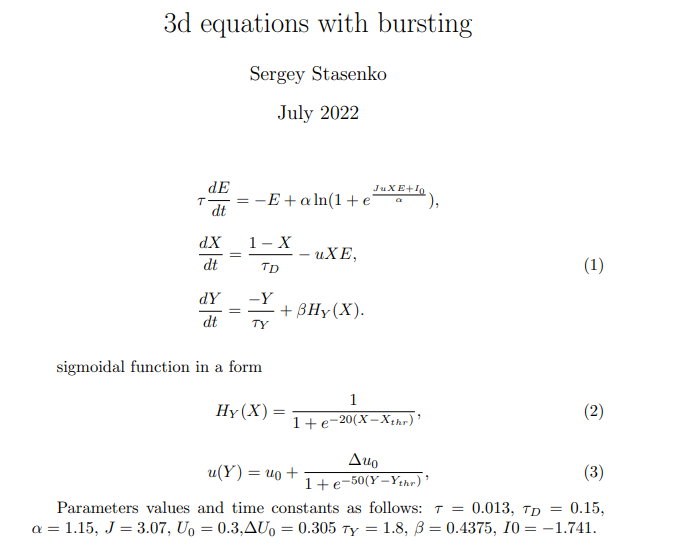

In [2]:
function H(X)
    return 1 / ( 1 + exp( -20 * ( X - Xthr ) ) )
end
function fu(Y)
    return u0 + Δu0 / (1 + exp( -50 * ( Y - Ythr ) ))
end

function model(u, p, t)
        
    α, τ, τD, J, u0, Δu0, τY, β, I0  = p
    E, X, Y = u

    du1 = ( -E + α * log( 1 + exp( (J  * fu(Y) *  X * E + I0) / α ) ) ) / τ
    du2 = ( 1 - X ) / τD - X * fu(Y) * E
    du3 = (-Y) / τY + β * H(X)
    
    return SVector(du1, du2, du3)
end

model (generic function with 1 method)

In [3]:
α = 1.15; τ = 0.013; τD = 0.15; J = 3.07; u0 = 0.3; Δu0 = 0.305; τY = 1.8; β = 0.4375; I0 = -1.741
Xthr = 0.9
Ythr = 0.5

0.5

In [4]:
p = SA[α, τ, τD, J, u0, Δu0, τY, β, I0]

9-element SVector{9, Float64} with indices SOneTo(9):
  1.15
  0.013
  0.15
  3.07
  0.3
  0.305
  1.8
  0.4375
 -1.741

In [5]:
condition = SA[1.8328775870480942, 2.9359232134802031, 0.5294116399663709]
tspan = (0., 1500000.)

(0.0, 1.5e6)

In [6]:
prob = ODEProblem(model, condition, tspan, p)

ODEProblem with uType SVector{3, Float64} and tType Float64. In-place: false
timespan: (0.0, 1.5e6)
u0: 3-element SVector{3, Float64} with indices SOneTo(3):
 1.8328775870480942
 2.935923213480203
 0.5294116399663709

In [7]:
sol = solve(prob, Rodas5(), maxiters = 5000000)

retcode: Success
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 60-element Vector{Float64}:
      0.0
      0.00288330292560853
      0.004394454202453531
      0.006798279089068387
      0.009202103975683242
      0.01165627508923069
      0.014110446202778137
      0.01658173696252952
      0.01917657382943585
      0.02237596381840633
      0.02452832755272639
      0.02804447814892445
      0.03187473211069638
      ⋮
      9.883795350007935
     12.961820899681312
     17.17886771033108
     23.502500317148517
     34.16108655627697
     57.117075688381725
    143.2647616777138
    611.0535152364239
   4592.749654409001
  44409.71104613477
 442579.3249633924
      1.5e6
u: 60-element Vector{SVector{3, Float64}}:
 [1.8328775870480942, 2.935923213480203, 0.5294116399663709]
 [3.7433979061684117, 2.8869502590353058, 0.5298247239893576]
 [5.596564808477959, 2.8571172571272716, 0.5300409589435968]
 [10.784314326083056, 2.79828532941852, 0.5303845552689073]

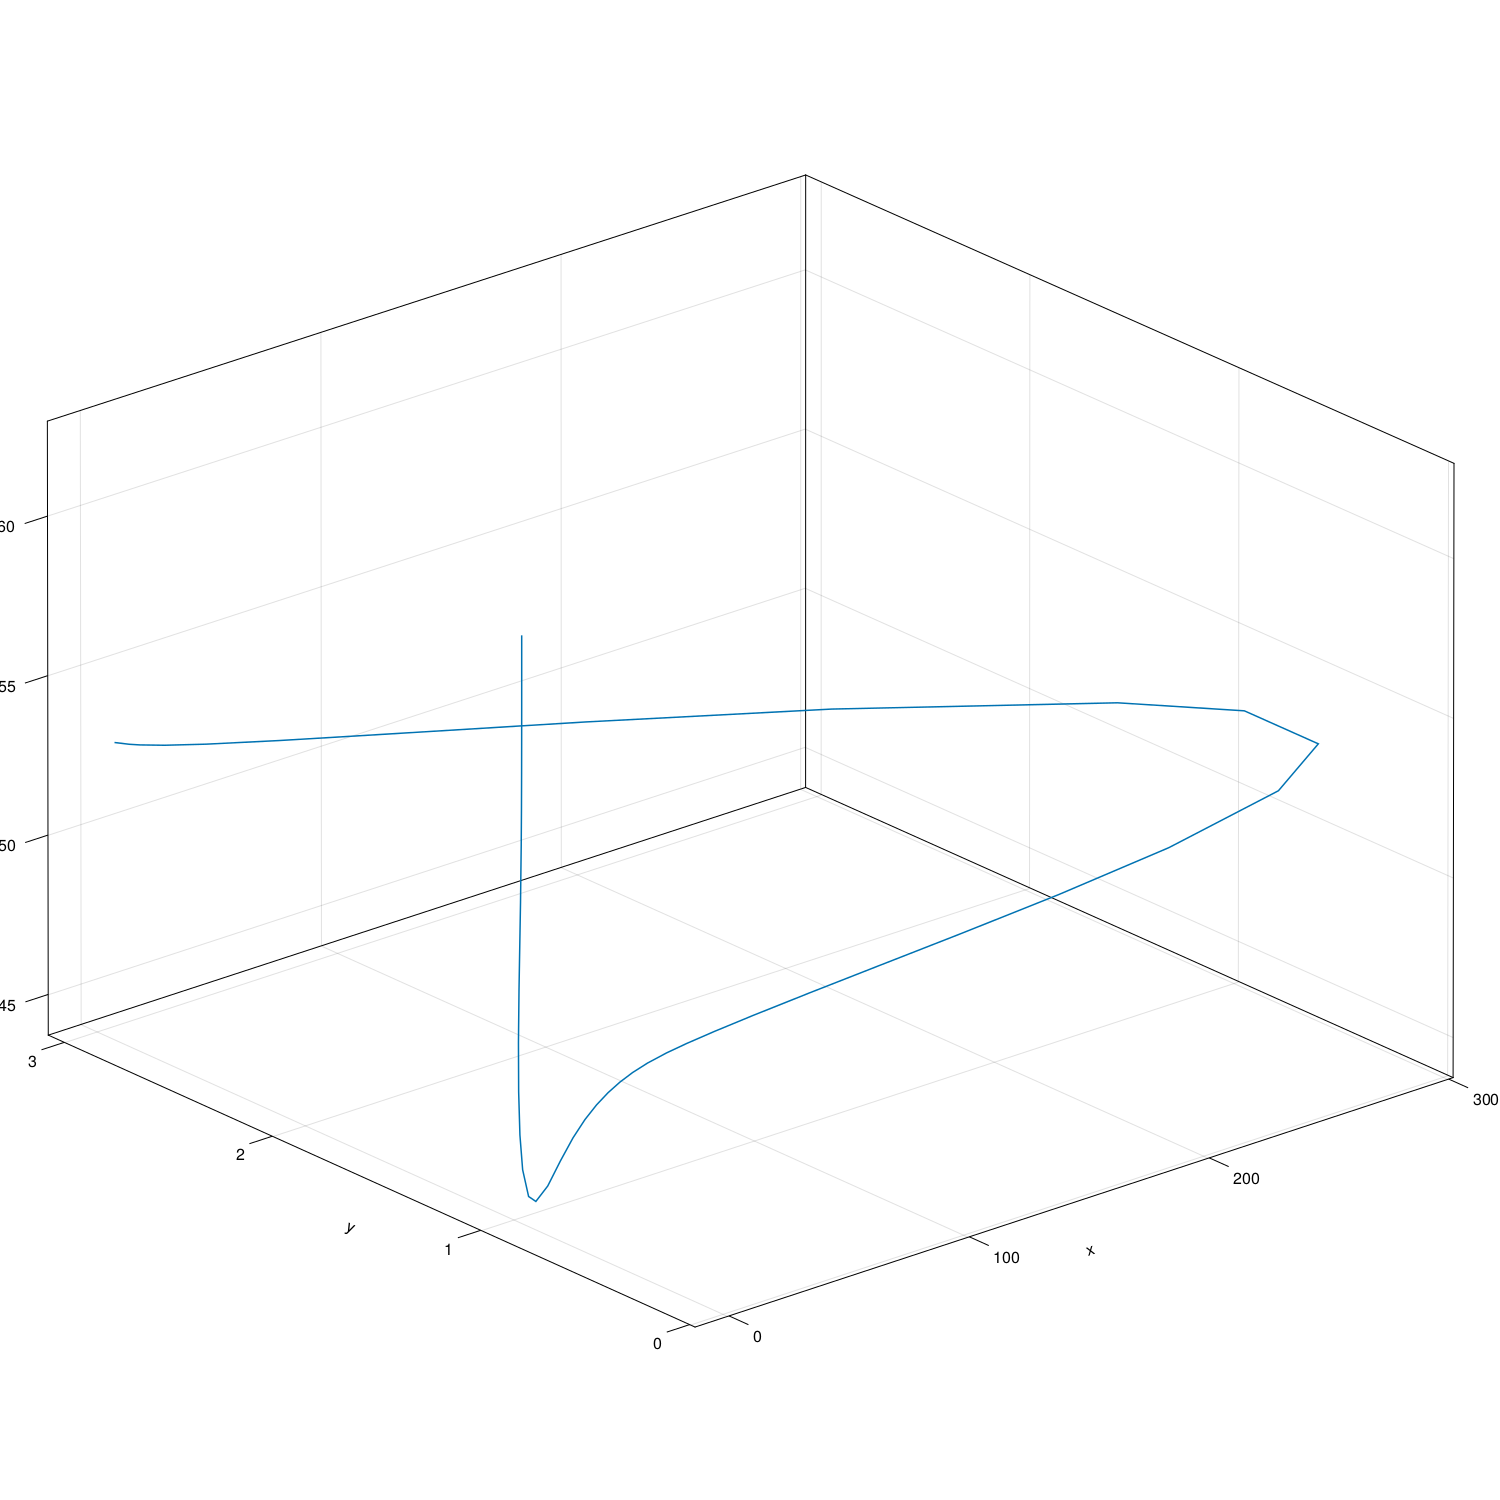

In [8]:
f = Figure(resolution = (1500, 1500))
ax = Axis3(f[1, 1])


lines!(ax, sol[1, :], sol[2, :], sol[3, :], linewidth = 1.5)

f

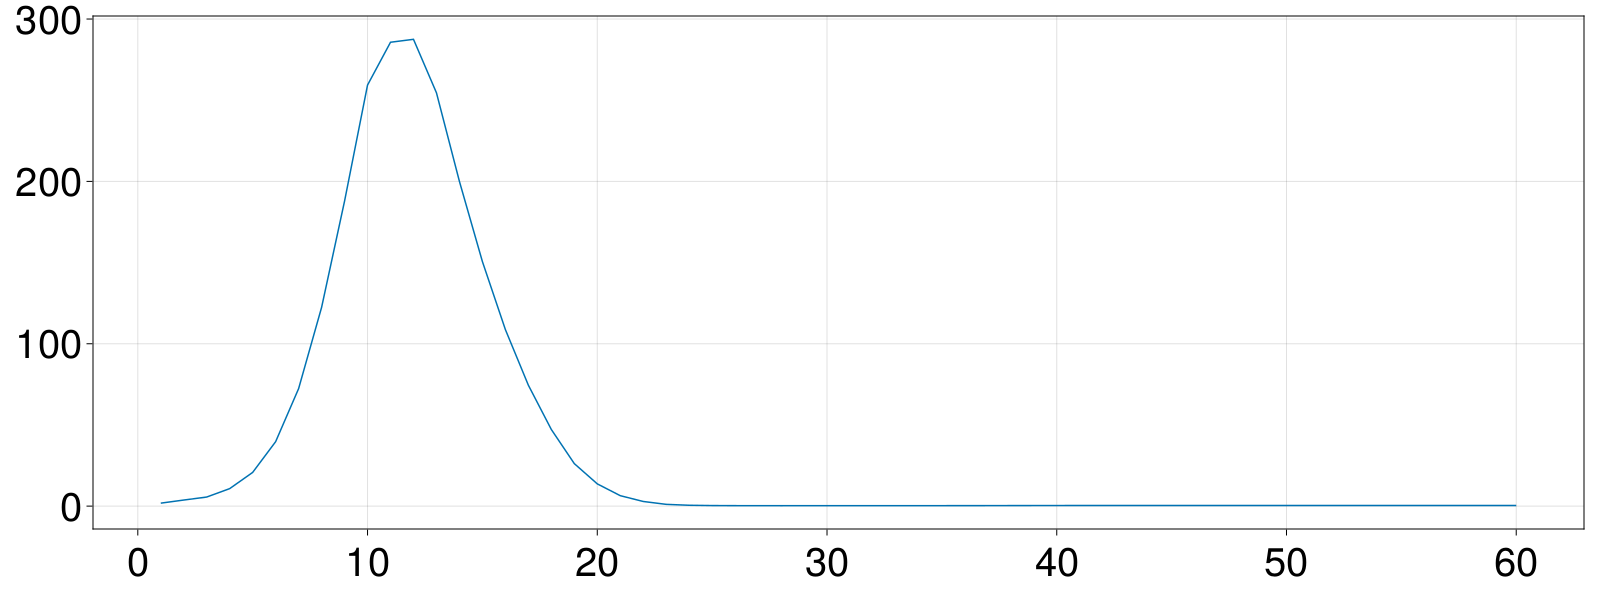

In [9]:
f = Figure(resolution = (1600, 600), fontsize = 40)
ax = Axis(f[1, 1])
lines!(sol[1, :])
f